In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data=pd.read_csv('insurancefraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.drop(['policy_bind_date','policy_number','insured_hobbies','incident_date','insured_occupation','incident_state','incident_date','auto_model','_c39'],axis=1,inplace=True)

In [4]:
data.shape

(1000, 32)

In [6]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

In [10]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severity              1000 non-null object
authorities_contacted          1000 non-null object
incident_city   

In [9]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_year',
       'fraud_reported'],
      dtype='object')

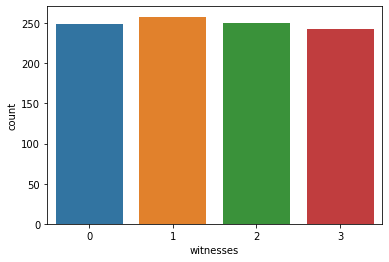

In [11]:
sns.countplot(data['witnesses'])

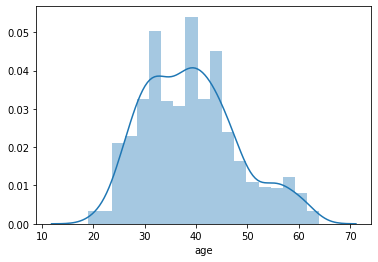

In [12]:
sns.distplot(data['age']);

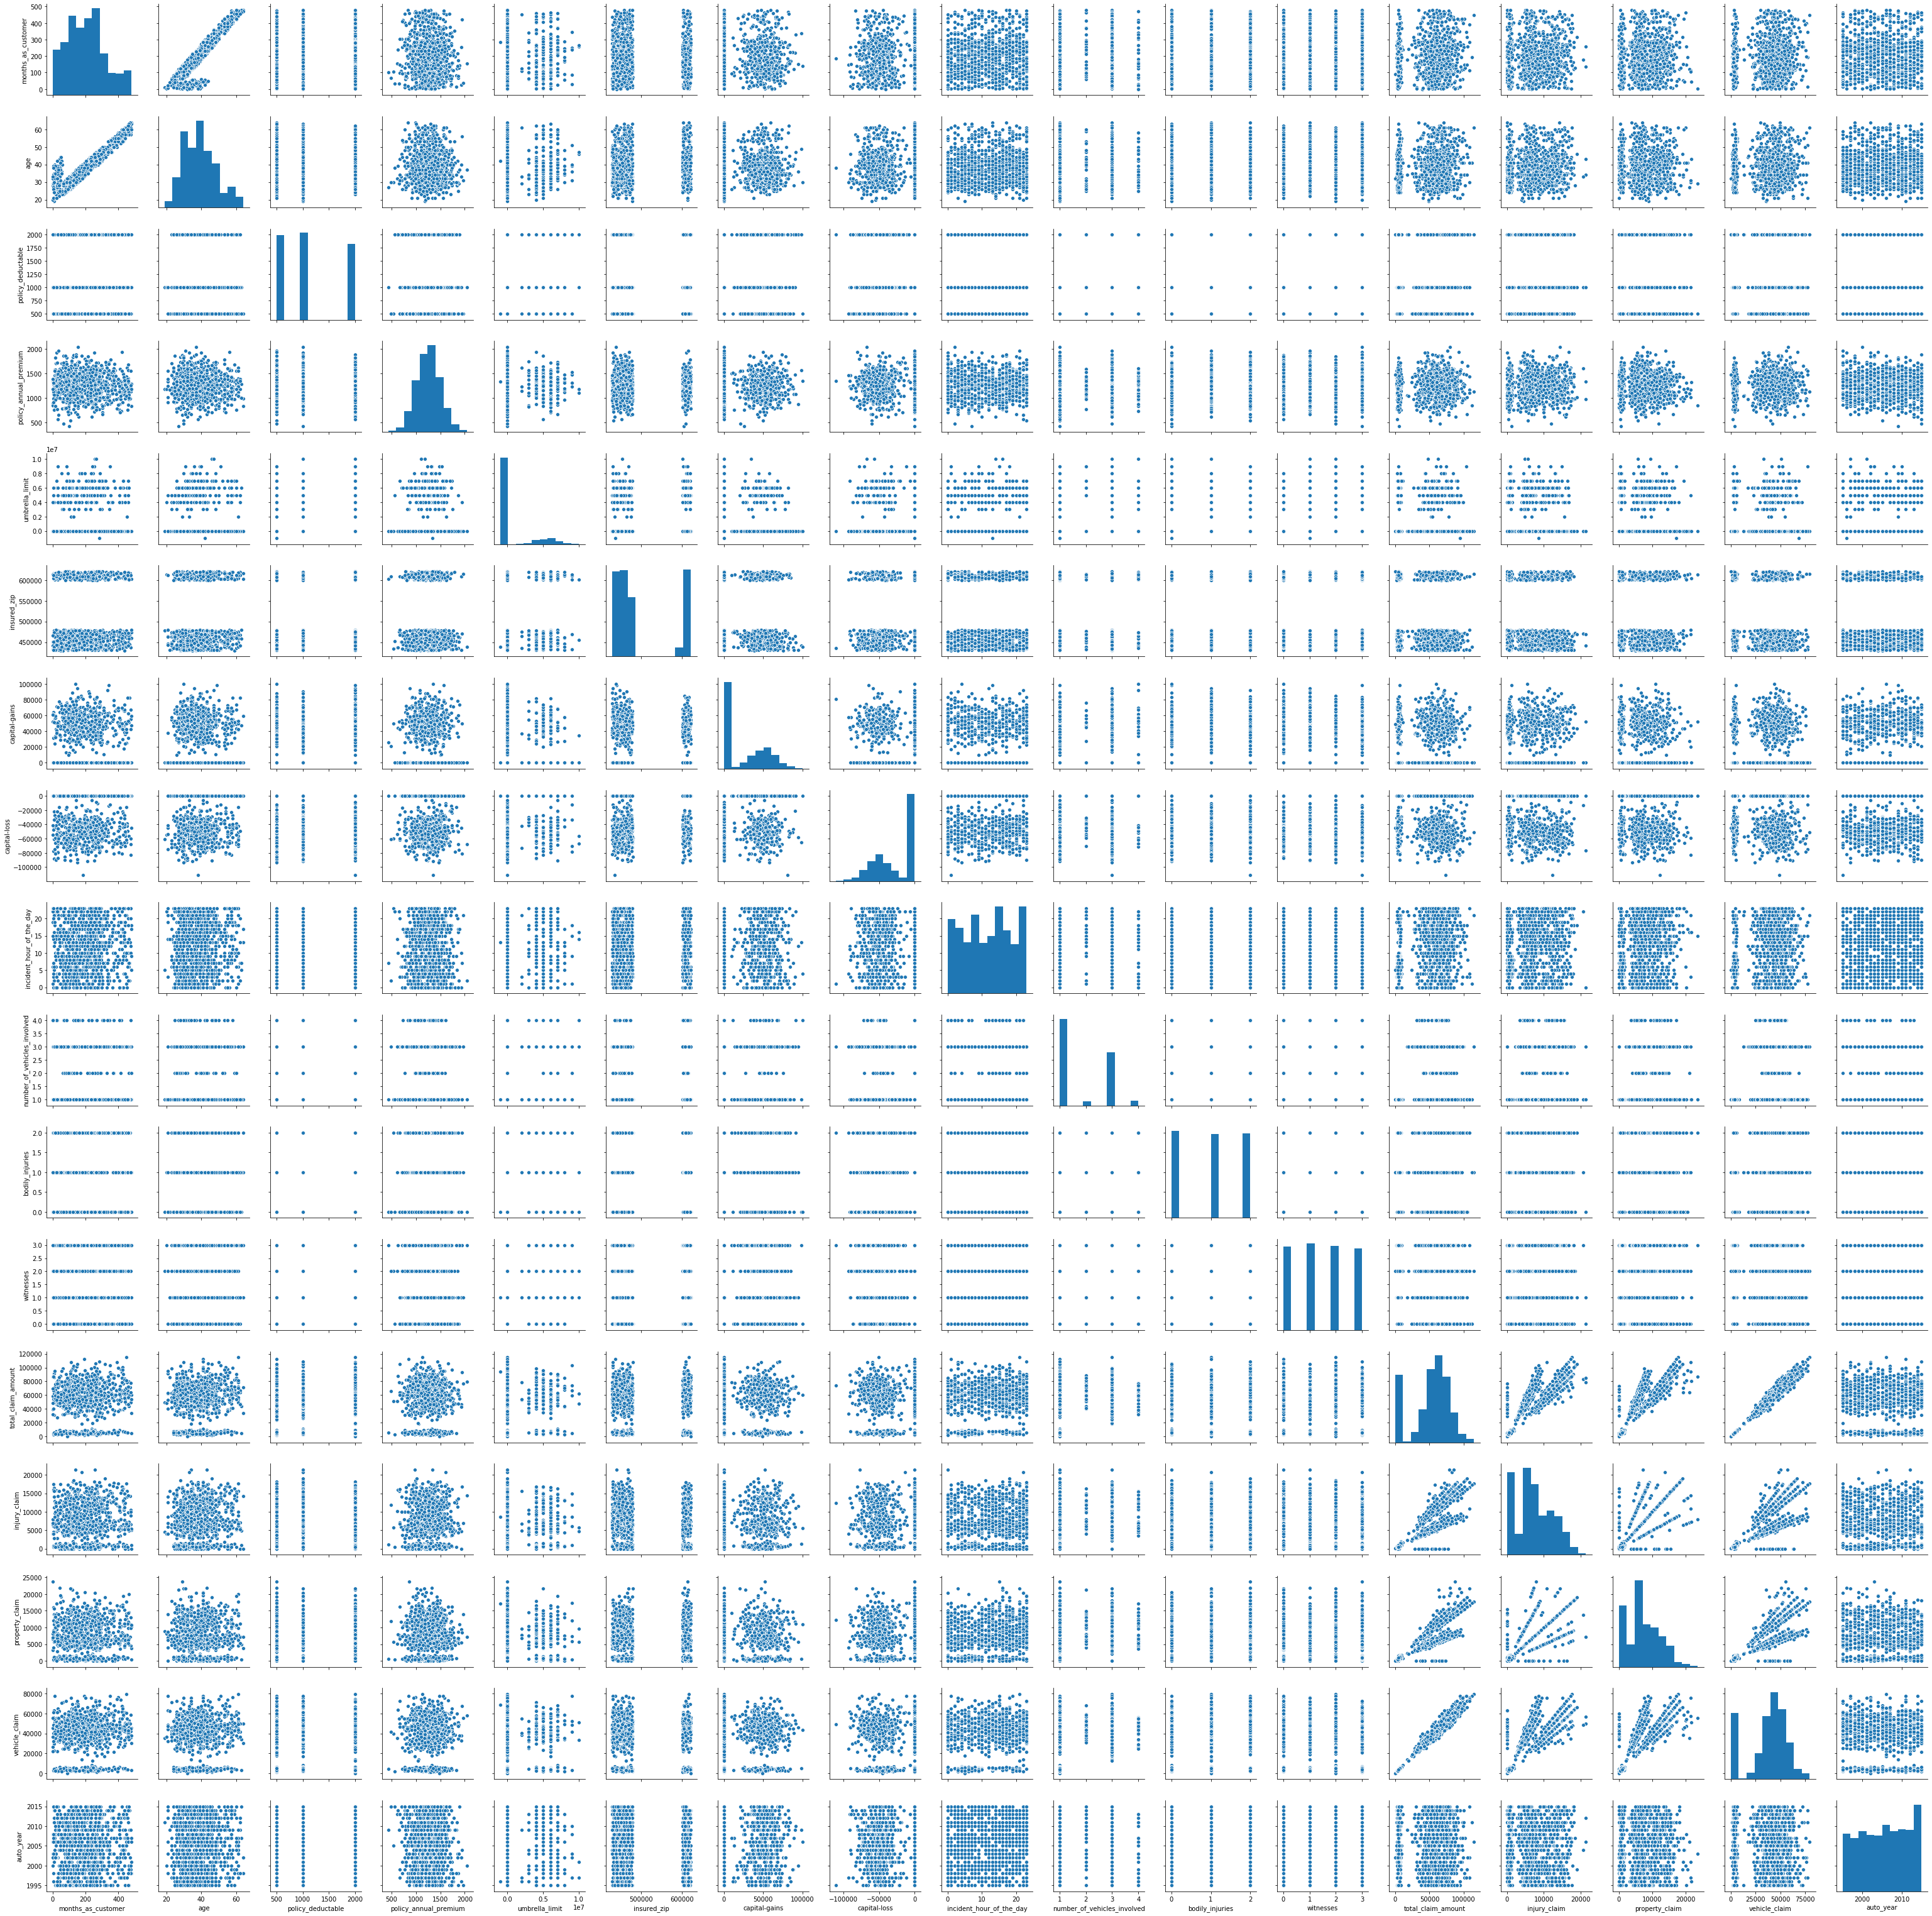

In [13]:
sns.pairplot(data);

In [14]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554


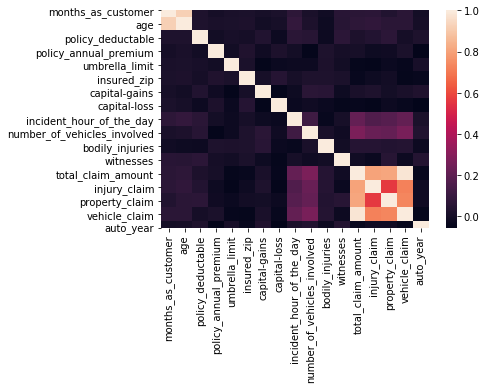

In [15]:
sns.heatmap(data.corr());

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for col in data.columns:
    data[col]=le.fit_transform(data[col])

In [18]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,299,29,2,1,1,732,1,486,1,4,...,1,2,2,563,258,512,545,10,9,1
1,212,23,1,1,2,396,5,519,1,4,...,0,0,0,44,46,45,38,8,12,1
2,123,10,2,0,2,740,5,6,0,6,...,2,3,1,143,337,104,116,4,12,0
3,239,22,0,1,2,743,6,812,0,6,...,1,2,1,451,245,249,521,3,19,1
4,212,25,0,2,1,902,6,850,1,0,...,0,1,1,81,70,36,66,0,14,0


months_as_customer                AxesSubplot(0.125,0.787927;0.133621x0.0920732)
age                            AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
policy_state                    AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
policy_csl                     AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
policy_deductable              AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
policy_annual_premium             AxesSubplot(0.125,0.677439;0.133621x0.0920732)
umbrella_limit                 AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
insured_zip                     AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
insured_sex                    AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
insured_education_level        AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
insured_relationship              AxesSubplot(0.125,0.566951;0.133621x0.0920732)
capital-gains                  AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
capital-loss                

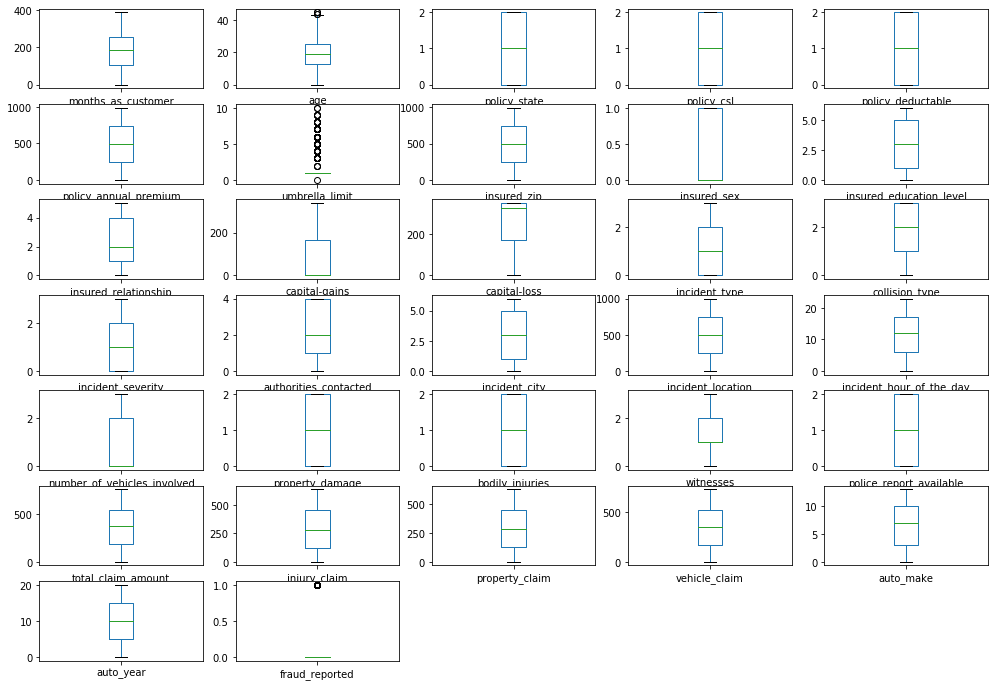

In [19]:
data.plot(kind='box',subplots=True,layout=(7,5),figsize=(17,12))

In [20]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1000, 32)
(985, 32)


months_as_customer                AxesSubplot(0.125,0.787927;0.133621x0.0920732)
age                            AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
policy_state                    AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
policy_csl                     AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
policy_deductable              AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
policy_annual_premium             AxesSubplot(0.125,0.677439;0.133621x0.0920732)
umbrella_limit                 AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
insured_zip                     AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
insured_sex                    AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
insured_education_level        AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
insured_relationship              AxesSubplot(0.125,0.566951;0.133621x0.0920732)
capital-gains                  AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
capital-loss                

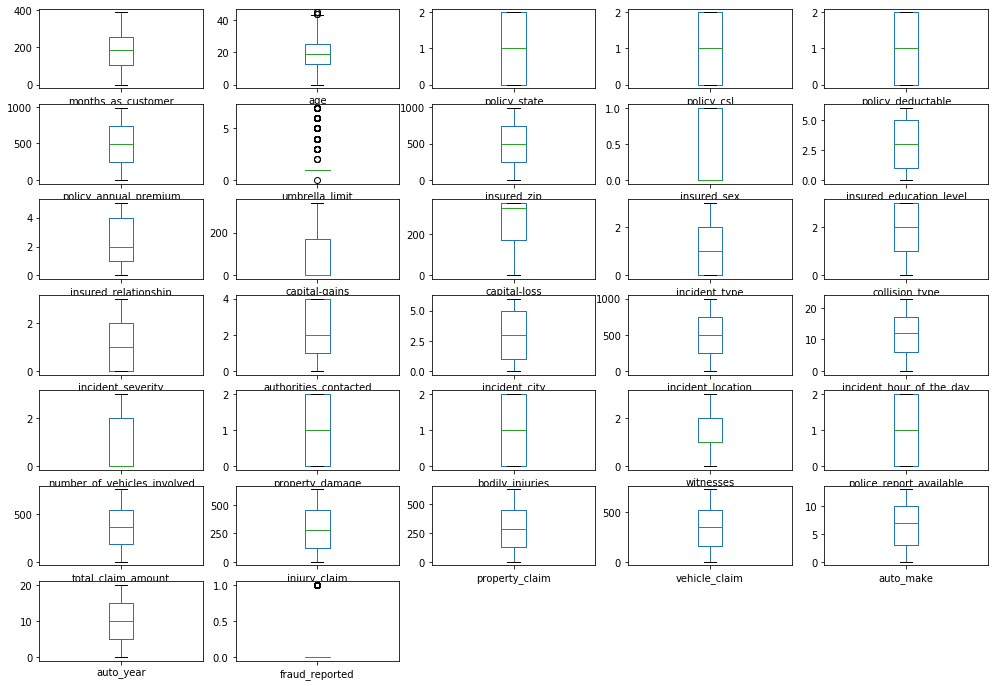

In [21]:
data_final.plot(kind='box',subplots=True,layout=(7,5),figsize=(17,12))

In [22]:
data=data_final

In [23]:
df_x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']
df_x.shape,y.shape

((985, 31), (985,))

In [24]:
df_x.skew()

months_as_customer             0.096656
age                            0.480506
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_zip                    0.005475
insured_sex                    0.144759
insured_education_level        0.004685
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_type                  0.091063
collision_type                -0.194288
incident_severity              0.281858
authorities_contacted         -0.113349
incident_city                  0.045660
incident_location             -0.003796
incident_hour_of_the_day      -0.034538
number_of_vehicles_involved    0.509302
property_damage                0.108209
bodily_injuries                0.005614
witnesses                      0.018336
police_report_available        0.042570


In [25]:
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])

In [26]:
for col in df_x.columns:
    if df_x.skew().loc[col]<0:
        df_x[col]=np.power(df_x[col],2)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year
0,1.145684,0.987658,1.313102,0.064417,0.041697,0.711009,-0.469515,-0.034138,1.074877,0.532983,...,1.302909,0.003724,0.459740,1.265154,0.894737,-0.164552,1.226756,0.948364,0.748457,-0.464707
1,0.276286,0.333646,-0.420686,0.064417,1.286285,-0.582257,1.988261,0.081019,1.074877,0.532983,...,-1.158003,-1.218860,-1.337258,-1.207419,-1.487930,-1.285142,-1.330220,-1.476691,0.085712,0.041665
2,-0.613099,-1.083381,1.313102,-1.179716,1.286285,0.751192,1.988261,-1.709137,-0.930339,1.558351,...,0.072453,1.226307,1.358239,0.028868,-1.033433,0.253026,-1.007176,-1.103605,-0.797948,0.041665
3,0.546099,0.224644,-0.998615,0.064417,1.286285,0.766373,2.333122,1.103466,-0.930339,1.558351,...,-1.158003,0.003724,0.459740,0.028868,0.380558,-0.233268,-0.213254,0.833569,-0.926815,1.785837
4,0.276286,0.551650,-0.998615,1.308550,0.041697,1.658861,2.333122,1.236070,1.074877,-1.517753,...,0.072453,-1.218860,-0.438759,0.028868,-1.318067,-1.158283,-1.379498,-1.342763,-1.092502,0.459623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,-1.812269,-0.102362,1.313102,1.308550,0.041697,0.018683,-0.469515,-1.663773,-0.930339,1.045667,...,1.302909,-1.218860,-0.438759,-1.207419,1.546642,1.770052,0.498538,1.517559,-0.429756,-0.143201
981,0.815912,0.224644,-0.998615,-1.179716,0.041697,0.879577,-0.469515,1.106956,-0.930339,1.558351,...,1.302909,1.226307,1.358239,-1.207419,1.799140,1.801766,1.752387,1.756716,2.018719,2.099305
982,-0.653071,-0.538371,1.313102,0.064417,-1.202891,0.511929,1.081169,-1.098460,-0.930339,1.045667,...,-1.158003,1.226307,1.358239,1.265154,0.637648,0.184311,0.230247,0.991413,1.135059,-1.107720
983,1.925145,2.513687,-0.998615,1.308550,1.286285,0.333206,1.988261,-1.182210,1.074877,-1.517753,...,-1.158003,-1.218860,-0.438759,1.265154,-0.661571,-0.640274,-0.645805,-0.433965,-1.074092,-1.043418


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ad=AdaBoostClassifier()

In [44]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=198,test_size=.30)

In [62]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('AdBoostingClassifier',ad))

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.8108108108108109


cross_val is  0.7705374149659863


F1_score is 0.5254237288135594


roc_auc_score 0.6838179519595449


classification report               precision    recall  f1-score   support

           0       0.84      0.92      0.88       226
           1       0.65      0.44      0.53        70

    accuracy                           0.81       296
   macro avg       0.74      0.68      0.70       296
weighted avg       0.80      0.81      0.80       296



confusion matrix
 [[209  17]
 [ 39  31]]





********************** SVC ************************
SVC(C=1.0, cache_siz

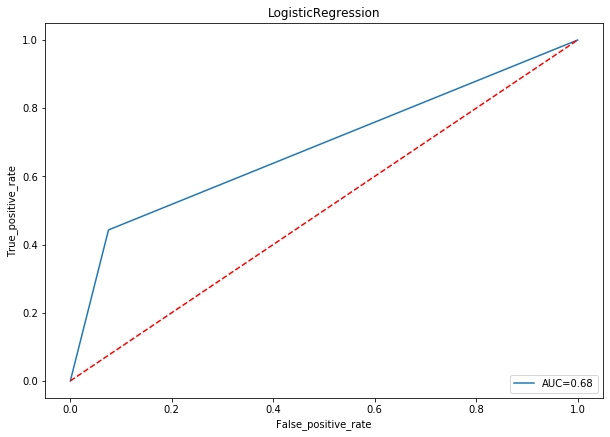

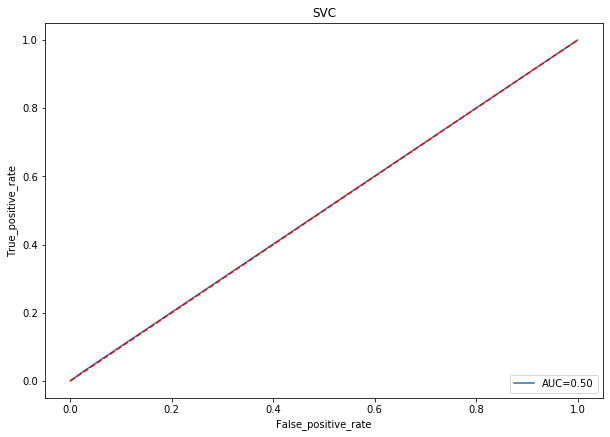

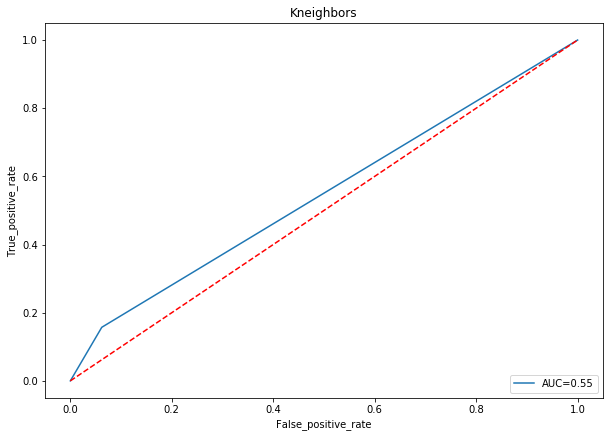

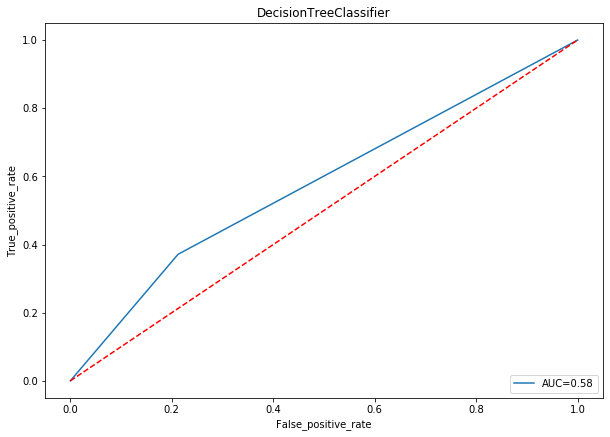

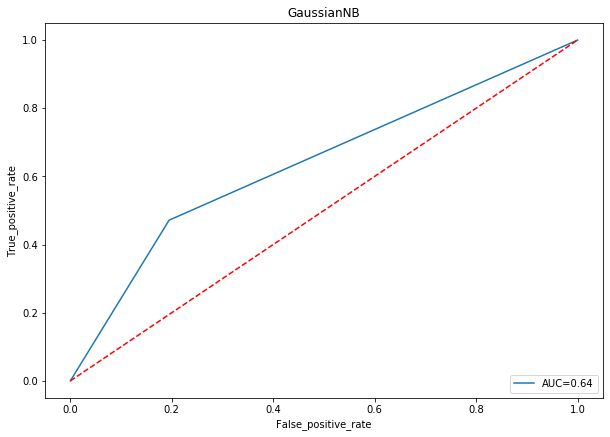

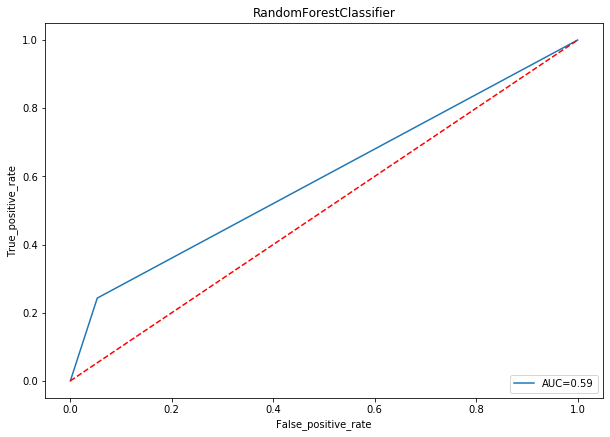

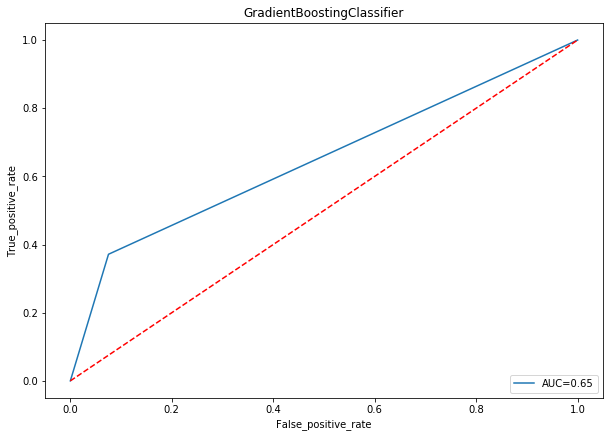

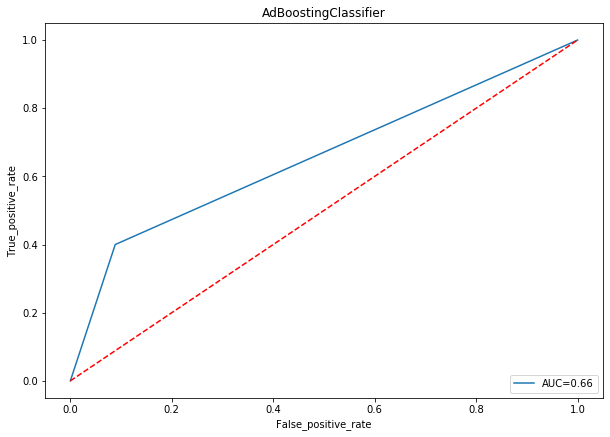

In [63]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [64]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,81.081081,77.053741,52.542373,68.381795
1,SVC,75.000000,75.129355,5.128205,50.101138
2,Kneighbors,75.337838,73.817089,23.157895,54.759798
3,DecisionTreeClassifier,68.918919,70.662152,36.111111,57.951960
4,GaussianNB,72.635135,74.409977,44.897959,63.836915
5,RandomForestClassifier,78.040541,77.872088,34.343434,59.487990
6,GradientBoostingClassifier,79.391892,79.602680,46.017699,64.810367
7,AdBoostingClassifier,79.054054,78.783282,47.457627,65.575221


I am choosing Logistic Regression as final model as it has good Accuracy, CV score and Roc_score

In [65]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
lrgd=GridSearchCV(lr,param_grid=[{'C':[1,10,30,50,100],
                                 'random_state':[i for i in range(52,100)]
                                  }],cv=5)
lrgd.fit(x_train,y_train)
print(lrgd.best_score_)
print(lrgd.best_params_)

0.7750362844702468
{'C': 10, 'random_state': 52}


In [66]:
from sklearn.externals import joblib
joblib.dump(lr,'lrFraudDetection_joblib')

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lrFraudDetection_joblib']